<a href="https://colab.research.google.com/github/varundeepAvi/Assignments_April/blob/main/04_apr_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Diabetes Prediction Model

Data Description

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses. This dataset, diabetes _ 012 _ health _ indicators _ BRFSS2015.csv, is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. There is class imbalance in this dataset. This dataset has 21 feature variables 0 is for No Diabetes or only during pregnancy 1 is for Prediabetes, and 2 is for Diabetes. Research in the field has identified the following as important risk factors for diabetes and other chronic illnesses like heart disease (not in strict order of importance): Blood Pressure (high) Cholesterol (high) Smoking Diabetes Obesity Age Sex Race Diet Exercise Alcohol Consumption BMI Household Income Marital Status Sleep Time since last checkup Education Health Care Coverage Mental Health Here, Diabetes_012 is our target variable and we will try to predict whether a person has diabetes or not based on the 21 features using bagging, specifically the Random Forest algorithm, which is an ensemble method based on bagging.

Conclusion

: The accuracy of the classifier on the validation set is approximately 0.848 or . This metric measures the overall correctness of the classifier's predictions.: The classification report provides additional metrics such as precision, recall, and F1-score for each class. Here's a breakdown:
For Class 0 (Non-diabetic):
Precision is approximately 0.86, which means that among the instances predicted as class 0,
Recall is approximately 0.98, which means that among all the actual class 0.0 instances,
, which is the harmonic mean of precision and recall.
For Class 1 (Pre-diabetic):
Precision is 0.0, which means that This might indicate an issue with class imbalance or data quality.
Recall is 0.0, indicating that
For class 2.0 (Diabetec):
Precision is approximately 0.56, indicating that
Recall is approximately 0.16, indicating that
The confusion matrix provides a detailed breakdown of true positives, true negatives, false positives, and false negatives for each class. It allows you to see how the classifier's predictions match with the actual classes. For Class 0: There are 41,884 true positives (correctly predicted), 0 false positives, and 820 false negatives. For Class 1: There are 0 true positives, 0 false positives, and 941 false negatives. For Class 2: There are 1,132 true positives, 0 false positives, and 5,959 false negatives. The "UndefinedMetricWarning" indicates that precision and F1-score are ill-defined for Class 1 because there are no predicted samples for this class, likely due to a lack of Class 1 instances in the validation set or an issue with class imbalance. Overall, the model appears to perform well for Class 0 but struggles with Class 1, possibly due to data imbalance or data quality issues for that class. Further analysis and data preprocessing may be needed to improve performance on Class 1.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
diabetes_data=pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes_012_health_indicators_BRFSS2015.csv'

In [ ]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [ ]:
diabetes_data=pd.read_csv('/content/content/MyDrive/Colab Notebooks/diabetes_012_health_indicators_BRFSS2015.csv')

In [ ]:
diabetes_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
diabetes_data.shape

(253680, 22)

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [ ]:
diabetes_data.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
diabetes_data.Diabetes_012.value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

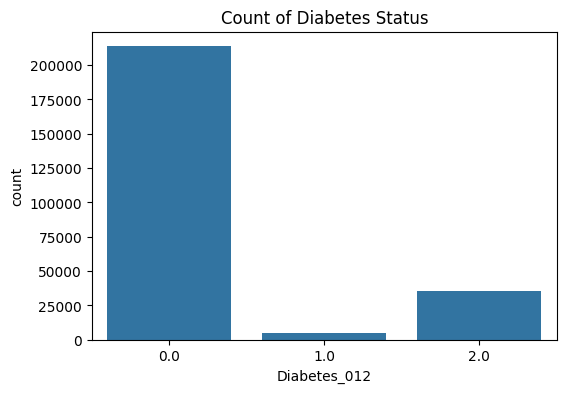

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_012', data=diabetes_data).set(title='Count of Diabetes Status')
plt.show()

[Text(0.5, 1.0, 'Distribution of BMI')]

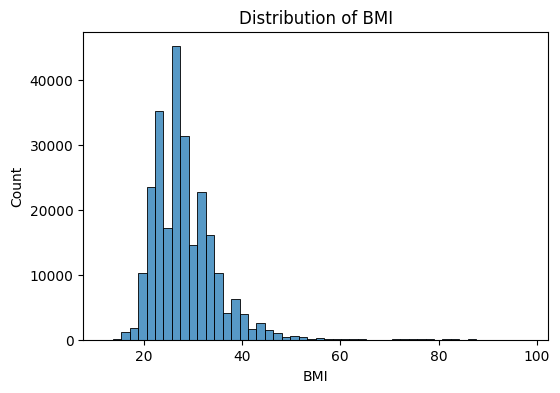

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(diabetes_data['BMI'],bins=50).set(title='Distribution of BMI')

In [ ]:
num_duplicates = diabetes_data.duplicated().sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 23899


[Text(0.5, 1.0, 'Distribution of Age Group')]

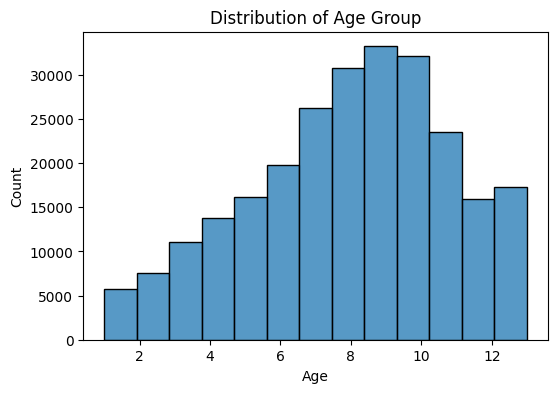

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(diabetes_data['Age'], bins=13).set(title='Distribution of Age Group')

[Text(0.5, 1.0, 'Distribution of Education Group')]

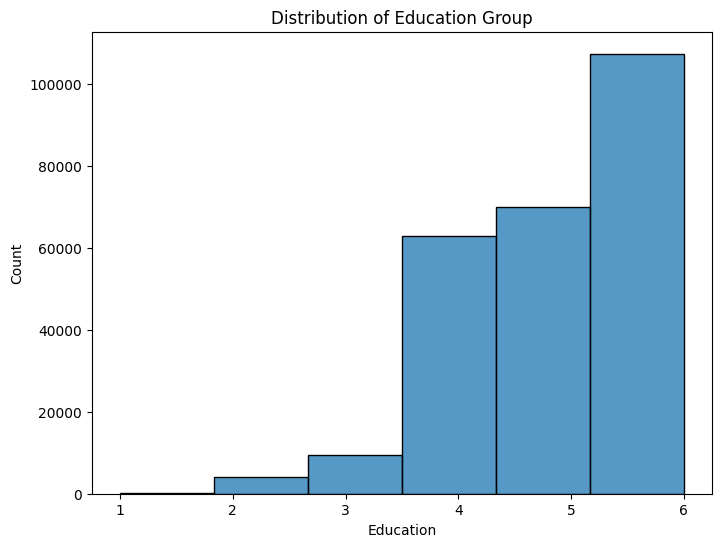

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_data['Education'],bins=6).set(title='Distribution of Education Group')

[Text(0.5, 1.0, 'Distribution of Income Group')]

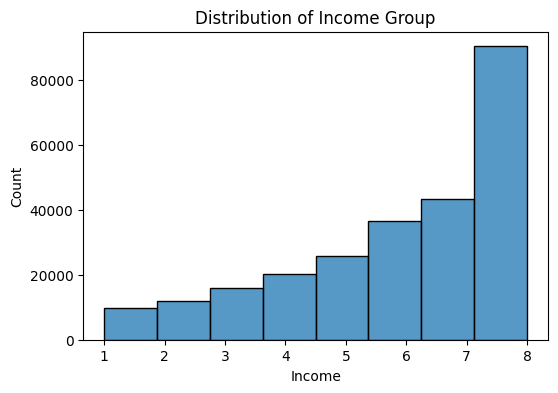

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(diabetes_data['Income'],bins=8).set(title='Distribution of Income Group')

In [ ]:
diabetes_data.drop_duplicates(inplace=True)

In [ ]:
diabetes_data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
count_0=diabetes_data['Diabetes_012'].value_counts()[0]
count_1=diabetes_data['Diabetes_012'].value_counts()[1]
count_2=diabetes_data['Diabetes_012'].value_counts()[2]
print(count_0)
print(count_1)
print(count_2)

190055
4629
35097


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X = diabetes_data.drop(columns='Diabetes_012')
y = diabetes_data['Diabetes_012']
x_smote, y_smote = smote.fit_resample(X, y)
print(len(x_smote))
print(len(y_smote))

570165
570165


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
y_pred = rfc.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     56808
         1.0       0.98      0.96      0.97     57365
         2.0       0.93      0.84      0.89     56877

    accuracy                           0.92    171050
   macro avg       0.92      0.92      0.92    171050
weighted avg       0.92      0.92      0.92    171050



In [ ]:
unique_values, counts = np.unique(y_pred, return_counts=True)
print("Prediction results:")
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")
print("0 predicts no diabetes or only during pregnancy, \n 1 predicts prediabetes, and 2 predicts the patient has diabetes.")

Prediction results:
0.0 occurs 62776 times
1.0 occurs 56602 times
2.0 occurs 51672 times
0 predicts no diabetes or only during pregnancy, 
 1 predicts prediabetes, and 2 predicts the patient has diabetes.
